#### Схема Эйткена
##### Для схемы Эйткена строятся следующие многочлены:

Пусть даны $x_i,\:$
$f(x_i) = y_i,\:$
$ 0\le i\le n;$

$L_{0,1}(x^*) = \frac{1}{x_1-x_0}$
$\begin{vmatrix} y_0 & x_0 - x^*\\ y_1 & x_1 - x^* \end{vmatrix}$

$L_{1,2}(x^*) = \frac{1}{x_2-x_1}$
$\begin{vmatrix} y_1 & x_1 - x^*\\ y_2 & x_2 - x^* \end{vmatrix}$

$L_{i,\,i+1,\,i+2}(x^*) = \frac{1}{x_{i+2}-x_i}$
$\begin{vmatrix} L_{i,\,i+1} & x_i - x^*\\ L_{i+1,\,i+2} & x_{i+2} - x^* \end{vmatrix}$

$L_{0,\,\ldots\,n}(x^*) = \frac{1}{x_n-x_0}$
$\begin{vmatrix} L_{i,\,i+1} & x_0 - x^*\\ L_{i+1,\,i+2} & x_n - x^* \end{vmatrix}$

In [16]:
# to convert to .tex use "jupyter nbconvert --to latex myfile.ipynb"
from math import cos, pi
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex


plt.style.use('seaborn-poster')


def scheme_Aitken(x: float, nodes_x: list, nodes_f: list):
    if len(nodes_x) == 2:
        return ((nodes_x[1] - nodes_x[0]) ** -1) * (nodes_f[0] * (nodes_x[1] - x) - (nodes_f[1] * (nodes_x[0] - x)))
    return ((nodes_x[-1] - nodes_x[0]) ** -1) * ((nodes_x[-1] - x) * scheme_Aitken(x, nodes_x[:-1], nodes_f[:-1]) -
                                                 (nodes_x[0] - x) * scheme_Aitken(x, nodes_x[1:],nodes_f[1:]))


def func_Runge(x: float):
    return (1 + x ** 2) ** -1


def Chebyshev_nodes(a: "begin of interval", b: "end of interval", n: int):
    nodes = []
    for i in range(1, n + 1):
        node = 1/2 * ((a + b) + (b - a) * cos((2 * i - 1) * pi / (2 * n)))
        nodes.append(round(node, 4))
    return nodes



<b>a)</b> Используя схему Эйткена вычислим приближённое значение функции $f(x)=\frac{1}{1+x^2}$ в точке
 $x^{*} = -4.5$, используя равноотстоящие узлы $x_i = -5 + i,\, 0\leq i\leq 10$

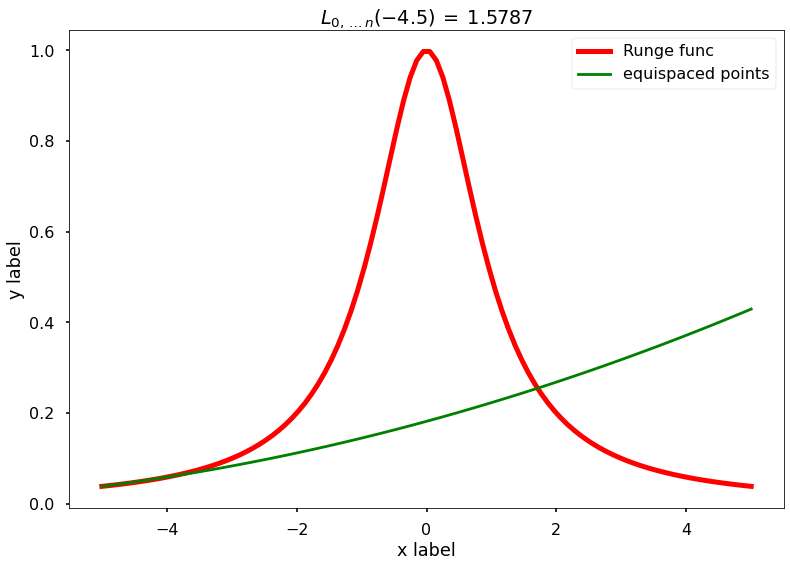

In [17]:
x_nodes = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
y_nodes = [func_Runge(x) for x in x_nodes]
x = -4.5

first_value = scheme_Aitken(x, x_nodes, y_nodes)


t = np.linspace(-5, 5, 100)
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, func_Runge(t), label='Runge func', linewidth=5, color='red')
ax.plot(t, scheme_Aitken(t, x_nodes, y_nodes), label="equispaced points", color='green')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("$L_{0,\,\ldots\,n}(%.1f)\: =\: %.4f$"%(x, first_value))
ax.legend()

<b>б)</b> Теперь при вычислении будем использовать соответствующее число $(n=11)$ узлов Чебышёва,
которые не являются равноотстоящими
 $x_{k}={\frac {1}{2}}(a+b)+{\frac {1}{2}}(b-a)\cos \left({\frac {2k-1}{2n}}\pi \right),\quad k=1,\ldots ,n.$


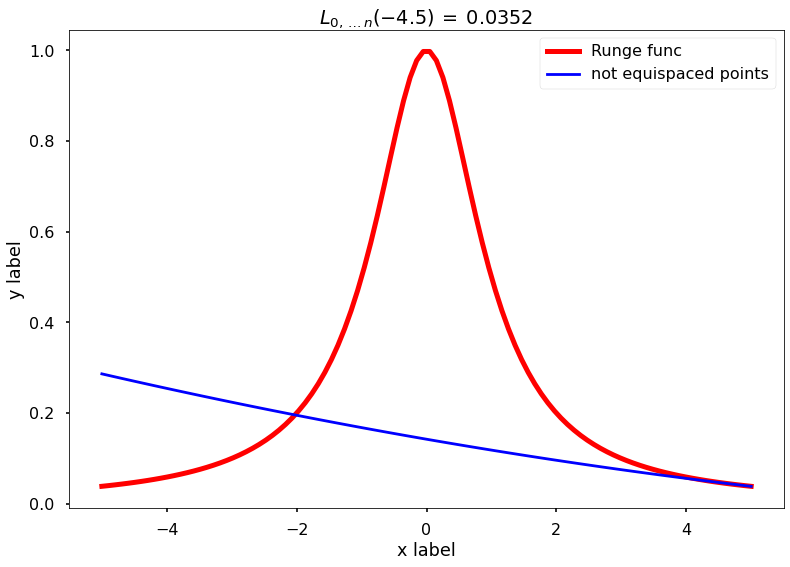

In [18]:
x_cheb_nodes = Chebyshev_nodes(-5, 5, 11)
y_cheb_nodes = [func_Runge(x) for x in x_cheb_nodes]

second_value = scheme_Aitken(x, x_cheb_nodes, y_cheb_nodes)

t = np.linspace(-5, 5, 100)
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, func_Runge(t), label='Runge func', linewidth=5, color='red')
ax.plot(t, scheme_Aitken(t, x_cheb_nodes, y_cheb_nodes), label="not equispaced points", color='blue')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("$L_{0,\,\ldots\,n}(%.1f)\: =\: %.4f$"%(x, second_value))
ax.legend()

<IPython.core.display.Latex object>

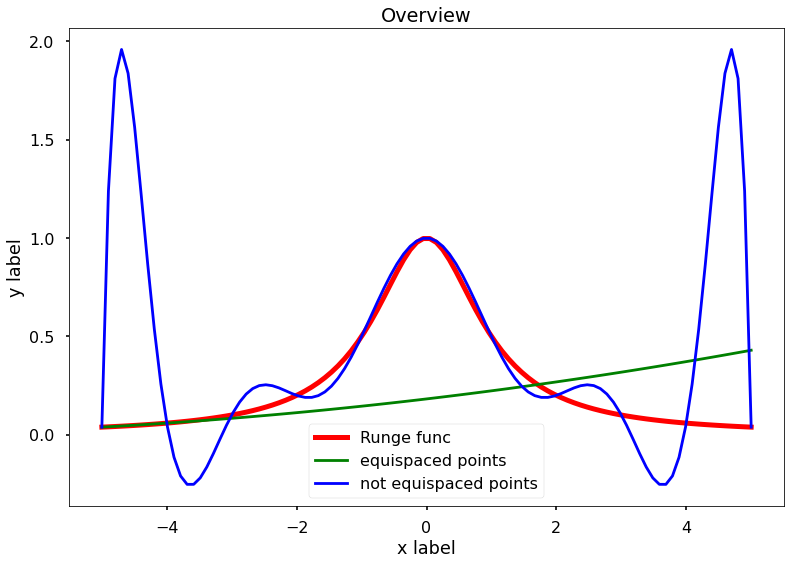

In [20]:
display(Latex("Точное значение функции $f(%.1f) = %.4f$. \n \
Значение функции $f$ при интерполировании равноотстоящими узлами:  $%.4f$.\n \
Значение функции $f$ при интерполировании узлами Чебышёва:  $%.4f$."%(x, func_Runge(x), first_value, second_value)))
t = np.linspace(-5, 5, 100)
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(t, func_Runge(t), label='Runge func', linewidth=5, color='red')
ax.plot(t, scheme_Aitken(t, x_nodes, y_nodes), label="equispaced points", color='green')# Plot some data on the axes.
ax.plot(t, scheme_Aitken(t, x_cheb_nodes, y_cheb_nodes), label="not equispaced points", color='blue')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Overview")
ax.legend()